In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_json('arxiv_cs.json',lines=True)
#(402168, 10)
print(df.shape)
print(df.head())
print(df.info())
#comments     242500 non-null  object
#journal-ref  40150 non-null   object
# doi          53043 non-null   object
print(df.describe())
# df.dropna(inplace=True)
#(15210, 10)
print(df.shape)
#15,000 papers * 5 MB/paper = 75,000 MB or 75 GB. min if we use all the pages in the paper
#ARE COMMENTS RELEVANT? Use it to filter amount of pages so we dont have a huge amount of data
#but the data size is dependent on the images and other media
print(df['comments'])
print(df['update_date'])
#journals are relevant
#doi's for citations!
#maybe build the knowledge graph based on abstracts?
#but if we retrieve a paper and need info for it call the api to get that and then store it
#in our db
#maybe experiment with a subset and cap the data somehow
#if we get the pdf's we need ocr to extract every relevant thing
# choice of embedding model(local or api)
# choice of llm(local or api)
# create embeddings for relations and maybe search also similar relations rather than just items
# # chunking?
# plt.figure(figsize=(12, 6))
# sns.histplot(df['_time'], bins=30, kde=True)  # KDE = Kernel Density Estimate
# plt.title('Distribution of Date Column')
# plt.xlabel('Date')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, x='categories')
# plt.title('Distribution of Category Column')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()
# if a value in the column include cs=> it's cs
print(df['categories'].value_counts())
# we have 3893 between cs topics and other areas such as math stats, phys economics, etc
print(df['categories'].nunique())
# check embedding model max input length to chunk based on that
# use semantic or logical chunking
# overlapping chunks?
# different handling of abstracts
# embedding model for figures?
# clean of references and latex commands
# dealing with equations?
# https://orkg.org/home/R132/Computer_Sciences
# citations as a measure for interaction with a certain paper
# on my laptop llm locally up to 7b param

(402168, 10)
          id                           authors  \
0  0704.0047            T. Kosel and I. Grabec   
1  0704.0050            T. Kosel and I. Grabec   
2  0704.0304                 Carlos Gershenson   
3  0704.0671                    Maxim Raginsky   
4  0704.0954  Soummya Kar and Jose M. F. Moura   

                                               title  \
0  Intelligent location of simultaneously active ...   
1  Intelligent location of simultaneously active ...   
2                  The World as Evolving Information   
3              Learning from compressed observations   
4  Sensor Networks with Random Links: Topology De...   

                                            comments  \
0          5 pages, 5 eps figures, uses IEEEtran.cls   
1          5 pages, 7 eps figures, uses IEEEtran.cls   
2  16 pages. Extended version, three more laws of...   
3  6 pages; submitted to the 2007 IEEE Informatio...   
4                     Submitted to IEEE Transactions   

            

In [3]:
# df.head().reset_index(drop=True)
df = pd.DataFrame(df)
# df.head()

df['id'] = range(int(len(df)))
df.head()

,id,authors,title,comments,journal-ref,doi,categories,abstract,update_date,_time
0,0,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 5 eps figures, uses IEEEtran.cls",None,None,cs.NE cs.AI,The intelligent acoustic emission locator is...,2009-09-29,2007-04-01
1,1,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 7 eps figures, uses IEEEtran.cls",None,None,cs.NE cs.AI,Part I describes an intelligent acoustic emi...,2007-05-23,2007-04-01
2,2,Carlos Gershenson,The World as Evolving Information,"16 pages. Extended version, three more laws of...","Minai, A., Braha, D., and Bar-Yam, Y., eds. Un...",10.1007/978-3-642-18003-3_10,cs.IT cs.AI math.IT q-bio.PE,This paper discusses the benefits of describ...,2013-04-05,2010-10-13
3,3,Maxim Raginsky,Learning from compressed observations,6 pages; submitted to the 2007 IEEE Informatio...,None,10.1109/ITW.2007.4313111,cs.IT cs.LG math.IT,The problem of statistical learning is to co...,2016-11-15,2007-04-05
4,4,Soummya Kar and Jose M. F. Moura,Sensor Networks with Random Links: Topology De...,Submitted to IEEE Transactions,None,10.1109/TSP.2008.920143,cs.IT cs.LG math.IT,"In a sensor network, in practice, the commun...",2009-11-13,2007-04-06


In [3]:
df.columns

Index(['id', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'categories', 'abstract', 'update_date', '_time'],
      dtype='object')

In [4]:
df[0:5]

,id,authors,title,comments,journal-ref,doi,categories,abstract,update_date,_time
0,0,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 5 eps figures, uses IEEEtran.cls",None,None,cs.NE cs.AI,The intelligent acoustic emission locator is...,2009-09-29,2007-04-01
1,1,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 7 eps figures, uses IEEEtran.cls",None,None,cs.NE cs.AI,Part I describes an intelligent acoustic emi...,2007-05-23,2007-04-01
2,2,Carlos Gershenson,The World as Evolving Information,"16 pages. Extended version, three more laws of...","Minai, A., Braha, D., and Bar-Yam, Y., eds. Un...",10.1007/978-3-642-18003-3_10,cs.IT cs.AI math.IT q-bio.PE,This paper discusses the benefits of describ...,2013-04-05,2010-10-13
3,3,Maxim Raginsky,Learning from compressed observations,6 pages; submitted to the 2007 IEEE Informatio...,None,10.1109/ITW.2007.4313111,cs.IT cs.LG math.IT,The problem of statistical learning is to co...,2016-11-15,2007-04-05
4,4,Soummya Kar and Jose M. F. Moura,Sensor Networks with Random Links: Topology De...,Submitted to IEEE Transactions,None,10.1109/TSP.2008.920143,cs.IT cs.LG math.IT,"In a sensor network, in practice, the commun...",2009-11-13,2007-04-06


In [4]:
df['abstract'][4]

'  In a sensor network, in practice, the communication among sensors is subject\nto:(1) errors or failures at random times; (3) costs; and(2) constraints since\nsensors and networks operate under scarce resources, such as power, data rate,\nor communication. The signal-to-noise ratio (SNR) is usually a main factor in\ndetermining the probability of error (or of communication failure) in a link.\nThese probabilities are then a proxy for the SNR under which the links operate.\nThe paper studies the problem of designing the topology, i.e., assigning the\nprobabilities of reliable communication among sensors (or of link failures) to\nmaximize the rate of convergence of average consensus, when the link\ncommunication costs are taken into account, and there is an overall\ncommunication budget constraint. To consider this problem, we address a number\nof preliminary issues: (1) model the network as a random topology; (2)\nestablish necessary and sufficient conditions for mean square sense (ms

In [6]:
from transformers import AutoTokenizer, AutoModel

# load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
model = AutoModel.from_pretrained('allenai/specter')

papers = df.iloc[0:20]
# concatenate title and abstract
title_abs = [f"{d['title']}{tokenizer.sep_token}{(d.get('abstract') or '')}{d.get('categories') or ''}" for _, d in papers.iterrows()]
# preprocess the input
inputs = tokenizer(title_abs, padding=True, truncation=True, return_tensors="pt", max_length=512)
result = model(**inputs)
# take the first token in the batch as the embedding
embeddings = result.last_hidden_state[:, 0, :]
embeddings = embeddings.detach().numpy()

/Users/ayushsharma/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
embeddings

array([[-0.71836907,  0.1798071 ,  0.3710811 , ..., -0.19621533,
        -0.40004176,  1.0407006 ],
       [-0.73565   ,  0.41746655, -0.01700109, ..., -0.01816587,
        -0.00619248,  1.0097213 ],
       [-0.5384444 ,  1.412775  ,  0.04937628, ..., -0.04651407,
        -0.16638836, -0.6813491 ],
       ...,
       [-0.21817335, -0.22725189,  0.18368822, ...,  0.16973436,
        -0.9345313 , -0.00422081],
       [-0.538928  ,  0.150068  , -0.34682778, ..., -0.48880064,
         0.85507303,  0.6134106 ],
       [-0.9555316 ,  0.7082136 ,  0.25921828, ..., -0.03809677,
        -0.84136766,  0.82694864]], dtype=float32)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming `embeddings_df` contains the embeddings for the papers
# Let's say you have 5 papers and their embeddings are stored in embeddings_df

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)
similarity_df = pd.DataFrame(similarity_matrix, columns=df['id'][:20], index=df['id'][:20])

print("Cosine Similarity Matrix:")
print(similarity_df)

Cosine Similarity Matrix:
id        0         1         2         3         4         5         6   \
id                                                                         
0   1.000000  0.916373  0.601677  0.685296  0.668556  0.597968  0.632883   
1   0.916373  1.000000  0.611593  0.659241  0.665593  0.586429  0.614936   
2   0.601677  0.611593  1.000000  0.694955  0.648738  0.733443  0.634187   
3   0.685296  0.659241  0.694955  1.000000  0.726599  0.620999  0.707900   
4   0.668556  0.665593  0.648738  0.726599  1.000000  0.617306  0.763867   
5   0.597968  0.586429  0.733443  0.620999  0.617306  1.000000  0.595142   
6   0.632883  0.614936  0.634187  0.707900  0.763867  0.595142  1.000000   
7   0.666798  0.602106  0.661653  0.752391  0.591627  0.550264  0.654886   
8   0.571222  0.598403  0.575256  0.607037  0.637500  0.490274  0.702682   
9   0.635400  0.646419  0.732240  0.706931  0.692586  0.658977  0.792811   
10  0.630177  0.664524  0.649330  0.656846  0.566520  0.553282

<Axes: xlabel='id', ylabel='id'>

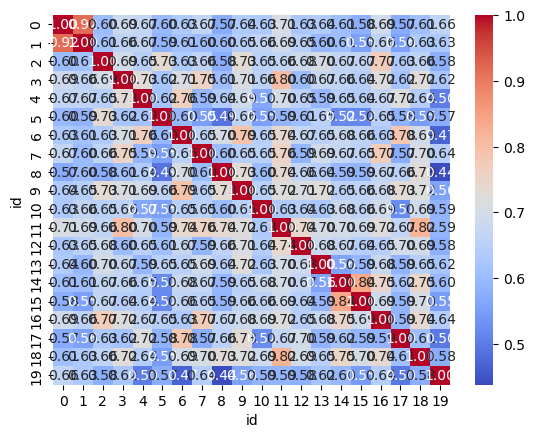

In [10]:
import seaborn as sns
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

In [ ]:
def get_embedding(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    # Use the [CLS] token's representation as the embedding
    embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embedding

# Generate embedding for the researcher's prompt
prompt = ""
prompt_embedding = get_embedding(prompt)

# Calculate cosine similarity between prompt embedding and each paper embedding
similarities = cosine_similarity(prompt_embedding, embeddings).flatten()

# Get indices of papers sorted by similarity in descending order
sorted_indices = np.argsort(-similarities)

# Rank the papers and display similarity scores
ranked_papers = [(index, similarities[index]) for index in sorted_indices]

# Print ranked papers with their similarity scores
print("Top Research Paper Matches:")
for rank, (index, score) in enumerate(ranked_papers, start=1):
    print(f"Rank {rank}: Paper {index} with similarity score {score:.4f}")

Top Research Paper Matches:
Rank 1: Paper 9 with similarity score 0.7730
Rank 2: Paper 14 with similarity score 0.7479
Rank 3: Paper 6 with similarity score 0.7430
Rank 4: Paper 18 with similarity score 0.7292
Rank 5: Paper 15 with similarity score 0.7245
Rank 6: Paper 17 with similarity score 0.7221
Rank 7: Paper 16 with similarity score 0.7175
Rank 8: Paper 11 with similarity score 0.7050
Rank 9: Paper 2 with similarity score 0.6963
Rank 10: Paper 4 with similarity score 0.6956
Rank 11: Paper 12 with similarity score 0.6920
Rank 12: Paper 8 with similarity score 0.6782
Rank 13: Paper 3 with similarity score 0.6741
Rank 14: Paper 13 with similarity score 0.6599
Rank 15: Paper 7 with similarity score 0.6584
Rank 16: Paper 10 with similarity score 0.6579
Rank 17: Paper 1 with similarity score 0.5932
Rank 18: Paper 19 with similarity score 0.5855
Rank 19: Paper 5 with similarity score 0.5804
Rank 20: Paper 0 with similarity score 0.5790


In [6]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

[[ 6.76568598e-02  6.34958297e-02  4.87131067e-02  7.93049783e-02
   3.74480113e-02  2.65280320e-03  3.93748730e-02 -7.09846662e-03
   5.93614243e-02  3.15370299e-02  6.00980595e-02 -5.29051945e-02
   4.06067595e-02 -2.59308368e-02  2.98427884e-02  1.12689065e-03
   7.35149756e-02 -5.03819771e-02 -1.22386612e-01  2.37028506e-02
   2.97265295e-02  4.24768850e-02  2.56338120e-02  1.99518562e-03
  -5.69191091e-02 -2.71598846e-02 -3.29035446e-02  6.60248399e-02
   1.19007148e-01 -4.58791442e-02 -7.26215392e-02 -3.25839706e-02
   5.23413867e-02  4.50552739e-02  8.25298857e-03  3.67023759e-02
  -1.39415516e-02  6.53919578e-02 -2.64272708e-02  2.06367142e-04
  -1.36643462e-02 -3.62809375e-02 -1.95043348e-02 -2.89738607e-02
   3.94270420e-02 -8.84091035e-02  2.62421300e-03  1.36713693e-02
   4.83062677e-02 -3.11565325e-02 -1.17329165e-01 -5.11690639e-02
  -8.85287598e-02 -2.18961891e-02  1.42986337e-02  4.44167741e-02
  -1.34814559e-02  7.43392557e-02  2.66382992e-02 -1.98762193e-02
   1.79190